### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:

print("Train lable shape before hot encoding: ", trainY.shape)
print('First 5 Train labels before hot encoding: ', trainY[0:5])

Train lable shape before hot encoding:  (60000,)
First 5 Train labels before hot encoding:  [9 0 0 3 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

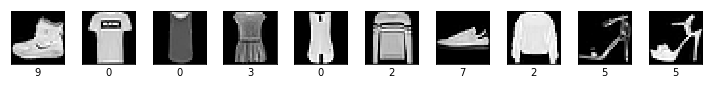

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(trainX[i],cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(np.argmax(trainY[i]))
    
plt.tight_layout()
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [13]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 2108.1789 - acc: 0.7396 - val_loss: 1410.7802 - val_acc: 0.7623
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 1589.5162 - acc: 0.7794 - val_loss: 1798.4230 - val_acc: 0.7351
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1591.5640 - acc: 0.7844 - val_loss: 1738.6312 - val_acc: 0.7815
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1507.4113 - acc: 0.7897 - val_loss: 1998.8676 - val_acc: 0.7692
Epoch 5/10
60000/60000 [==============================] - 2s 42us/sample - loss: 1523.5110 - acc: 0.7902 - val_loss: 1416.5301 - val_acc: 0.7728
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1450.2839 - acc: 0.7968 - val_loss: 1205.4778 - val_acc: 0.8172
Epoch 7/10
60000/60000 [==============================] - 2s 42us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [17]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5944 - acc: 0.7962 - val_loss: 0.5049 - val_acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4895 - acc: 0.8317 - val_loss: 0.4874 - val_acc: 0.8316
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4675 - acc: 0.8395 - val_loss: 0.4854 - val_acc: 0.8334
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4580 - acc: 0.8428 - val_loss: 0.4736 - val_acc: 0.8378
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4492 - acc: 0.8455 - val_loss: 0.4737 - val_acc: 0.8380
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4443 - acc: 0.8455 - val_loss: 0.4675 - val_acc: 0.8403
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4391 - acc: 0.8484 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.9452 - acc: 0.6773 - val_loss: 0.7008 - val_acc: 0.7652
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6459 - acc: 0.7781 - val_loss: 0.6140 - val_acc: 0.7899
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5903 - acc: 0.7961 - val_loss: 0.5786 - val_acc: 0.8049
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5598 - acc: 0.8092 - val_loss: 0.5586 - val_acc: 0.8111
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5413 - acc: 0.8140 - val_loss: 0.5388 - val_acc: 0.8166
Epoch 6/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5262 - acc: 0.8184 - val_loss: 0.5285 - val_acc: 0.8183
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5164 - acc: 0.8222 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st Dense/hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 2nd Dense/hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd Dense/hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#optimizer with learning parameter
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [24]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5708 - acc: 0.8033 - val_loss: 0.4368 - val_acc: 0.8462
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3885 - acc: 0.8589 - val_loss: 0.3859 - val_acc: 0.8661
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3531 - acc: 0.8702 - val_loss: 0.4163 - val_acc: 0.8600
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3289 - acc: 0.8776 - val_loss: 0.3554 - val_acc: 0.8707
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3132 - acc: 0.8828 - val_loss: 0.3690 - val_acc: 0.8643
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2959 - acc: 0.8904 - val_loss: 0.3709 - val_acc: 0.8714
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2837 - acc: 0.8936 - val_loss: 0.